# Superstore Sales Data Preprocessing

In [3]:
import warnings
import numpy as np
import pandas as pd
import plotly as px
import seaborn as sns
import nbformat as nbf
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots

 Load the dataset


In [4]:
df = pd.read_csv("Superstore Sales Dataset.csv")

View the first few rows of the dataset

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Basic Exploration

In [6]:
df.shape

(9800, 18)

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [9]:
print(list(df.columns.values))

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']


Checking the structure of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data preprocessing
Handling Null Values and Duplicates.

In [11]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Handling missing values in the Postal Code column

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [14]:
df.duplicated().sum()

0

correlation heatmap of numerical features

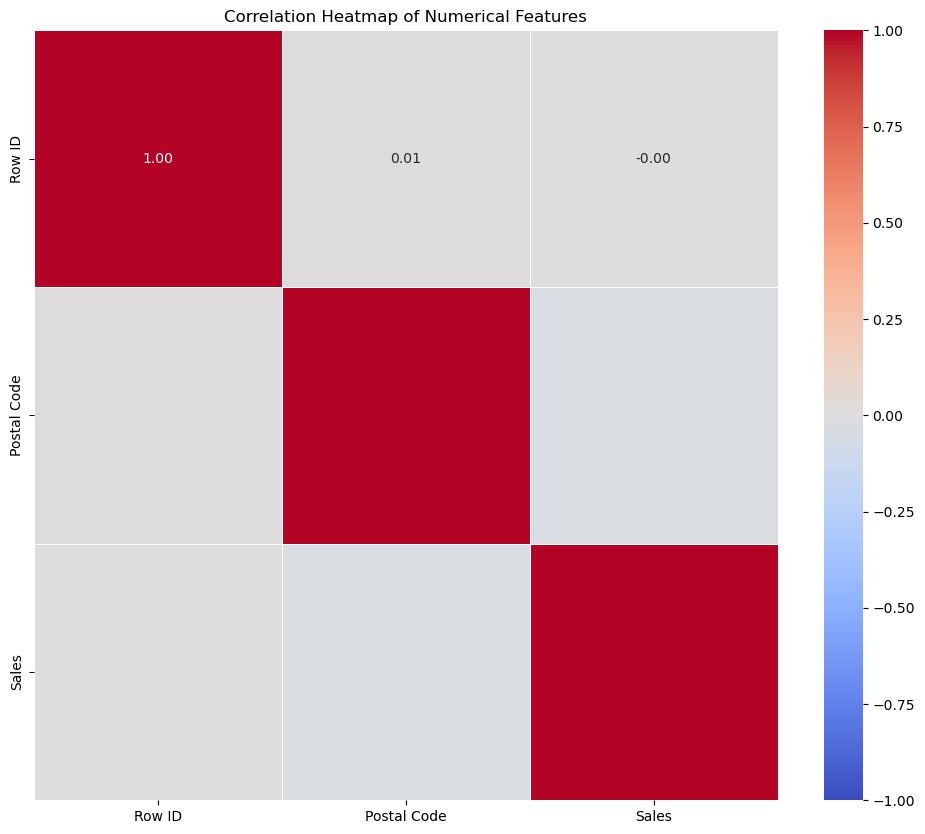

In [15]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Converting date columns to datetime format

In [16]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")


df["order_year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month

df["Ship_year"]=df["Ship Date"].dt.year
df["Ship_month"]=df["Ship Date"].dt.month

CHECK DATA

In [17]:
def check_columns(data):
    for column in data.columns:
        print("Column Name: ", column + " &","The Number of Unique Values:", len(data[column].unique()))

check_columns(df)

Column Name:  Row ID & The Number of Unique Values: 9789
Column Name:  Order ID & The Number of Unique Values: 4916
Column Name:  Order Date & The Number of Unique Values: 1229
Column Name:  Ship Date & The Number of Unique Values: 1326
Column Name:  Ship Mode & The Number of Unique Values: 4
Column Name:  Customer ID & The Number of Unique Values: 793
Column Name:  Customer Name & The Number of Unique Values: 793
Column Name:  Segment & The Number of Unique Values: 3
Column Name:  Country & The Number of Unique Values: 1
Column Name:  City & The Number of Unique Values: 529
Column Name:  State & The Number of Unique Values: 48
Column Name:  Postal Code & The Number of Unique Values: 626
Column Name:  Region & The Number of Unique Values: 4
Column Name:  Product ID & The Number of Unique Values: 1860
Column Name:  Category & The Number of Unique Values: 3
Column Name:  Sub-Category & The Number of Unique Values: 17
Column Name:  Product Name & The Number of Unique Values: 1848
Column N

In [18]:
df['Segment'].value_counts()

Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64

In [19]:
df['Region'].value_counts()

Region
West       3140
East       2774
Central    2277
South      1598
Name: count, dtype: int64

In [20]:
df['Category'].value_counts()

Category
Office Supplies    5903
Furniture          2076
Technology         1810
Name: count, dtype: int64

In [21]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [22]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

In [23]:
df['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

# Checking for duplicates and dropping them if any

In [24]:
df.drop_duplicates(inplace=True)

# UNDERSTANDING THE SHAPE OF DATA

In [25]:
# Simple Random Sampling
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,Ship_year,Ship_month
7387,7388,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,...,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",1336.44,2017,9,2017,9
7702,7703,CA-2017-114601,2017-08-26,2017-09-02,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Detroit,...,Central,OFF-PA-10000605,Office Supplies,Paper,Xerox 1950,11.56,2017,8,2017,9
7390,7391,CA-2018-108035,2018-11-29,2018-12-03,Standard Class,TT-21070,Ted Trevino,Consumer,United States,Chattanooga,...,South,FUR-FU-10004017,Furniture,Furnishings,"Executive Impressions 13"" Chairman Wall Clock",101.52,2018,11,2018,12
1628,1629,CA-2018-101049,2018-06-21,2018-06-25,Second Class,AS-10240,Alan Shonely,Consumer,United States,Cleveland,...,East,FUR-FU-10004415,Furniture,Furnishings,"Stacking Tray, Side-Loading, Legal, Smoke",17.92,2018,6,2018,6
3678,3679,CA-2016-132626,2016-07-09,2016-07-14,Standard Class,BT-11680,Brian Thompson,Consumer,United States,Clinton,...,East,TEC-MA-10002428,Technology,Machines,Fellowes Powershred HS-440 4-Sheet High Securi...,464.97,2016,7,2016,7


In [26]:
# Stratified Sampling
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

In [27]:
group1 = df.loc[df["Ship Mode"] == "Standard Class"]
group2 = df.loc[df["Ship Mode"] == "Second Class"]
group3 = df.loc[df["Ship Mode"] == "First Class"]
group4 = df.loc[df["Ship Mode"] == "Same Day"]

print(len(group1))
print(len(group2))
print(len(group3))
print(len(group4))

5849
1901
1501
538


In [28]:
sample_size = 1000
total = len(df)
group_percentage = sample_size / total

group1_sample = group1.sample(round(group_percentage*len(group1)))
group2_sample = group2.sample(round(group_percentage*len(group2)))
group3_sample = group3.sample(round(group_percentage*len(group3)))
group4_sample = group4.sample(round(group_percentage*len(group4)))

stratified_sample = pd.concat([group1_sample,group2_sample,group3_sample,group4_sample])
stratified_sample

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,Ship_year,Ship_month
3268,3269,CA-2015-143840,2015-05-22,2015-05-29,Standard Class,EH-14185,Evan Henry,Consumer,United States,Decatur,...,South,TEC-PH-10003171,Technology,Phones,Plantronics Encore H101 Dual Earpieces Headset,44.950,2015,5,2015,5
2764,2765,CA-2018-165757,2018-06-22,2018-06-28,Standard Class,PL-18925,Paul Lucas,Home Office,United States,Philadelphia,...,East,OFF-BI-10003982,Office Supplies,Binders,Wilson Jones Century Plastic Molded Ring Binders,31.155,2018,6,2018,6
2732,2733,CA-2015-107594,2015-07-02,2015-07-06,Standard Class,EH-13945,Eric Hoffmann,Consumer,United States,Plainfield,...,East,TEC-PH-10002923,Technology,Phones,Logitech B530 USB Headset - headset - Full siz...,73.980,2015,7,2015,7
866,867,CA-2015-149020,2015-01-10,2015-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,2015,1,2015,1
6795,6796,CA-2016-145394,2016-11-16,2016-11-20,Standard Class,MC-17605,Matt Connell,Corporate,United States,Chicago,...,Central,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",34.504,2016,11,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2952,CA-2018-134915,2018-11-12,2018-11-12,Same Day,EM-14140,Eugene Moren,Home Office,United States,Glendale,...,West,FUR-CH-10004875,Furniture,Chairs,Harbour Creations 67200 Series Stacking Chairs,113.888,2018,11,2018,11
5215,5216,CA-2017-145898,2017-09-26,2017-09-26,Same Day,CM-12445,Chuck Magee,Consumer,United States,Redlands,...,West,OFF-PA-10001667,Office Supplies,Paper,Great White Multi-Use Recycled Paper (20Lb. an...,29.900,2017,9,2017,9
9573,9574,CA-2016-113131,2016-09-24,2016-09-24,Same Day,MB-17305,Maria Bertelson,Consumer,United States,Columbus,...,East,OFF-AR-10003504,Office Supplies,Art,Newell 347,17.120,2016,9,2016,9
4698,4699,US-2016-138121,2016-12-17,2016-12-17,Same Day,JL-15835,John Lee,Consumer,United States,Detroit,...,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",212.130,2016,12,2016,12


In [29]:
# Displaying the updated dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,Ship_year,Ship_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10


 # creating a custom palette

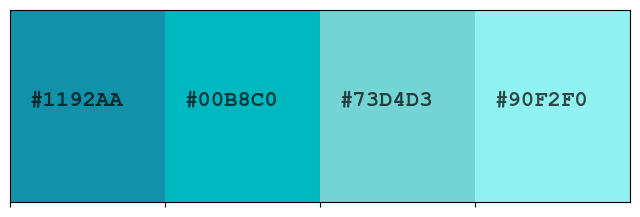

In [30]:
colors = ['#1192AA','#00B8C0', '#73D4D3', '#90F2F0']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha =0.7)
plt.gcf().set_facecolor('white')

plt.show()

# State

In [31]:

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [32]:
# Create new column with State Abbreviations
df['State_abb'] = df['State'].replace(us_state_to_abbrev)

In [33]:
fig = go.Figure(data=go.Choropleth(
    locations= df['State_abb'].value_counts().index, # Spatial coordinates
    z = df['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# **Ship Mode**

In [34]:
fig = px.bar(x = df['Ship Mode'].value_counts().index, y = df['Ship Mode'].value_counts(),
             color = df['Ship Mode'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Shipping Modes",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# **Segment**

In [35]:
fig = px.bar(x = df['Segment'].value_counts().index, y = df['Segment'].value_counts(),
             color = df['Segment'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# **Region**

In [36]:
fig = px.bar(x = df['Region'].value_counts().index, y = df['Region'].value_counts(),
             color = df['Region'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Region",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# **Category**

In [37]:
fig = px.bar(x = df['Category'].value_counts().index, y = df['Category'].value_counts(),
             color = df['Category'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Sub-Category

In [38]:
fig = px.bar(x = df['Sub-Category'].value_counts().index, y = df['Sub-Category'].value_counts(),
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# **Highest customers**

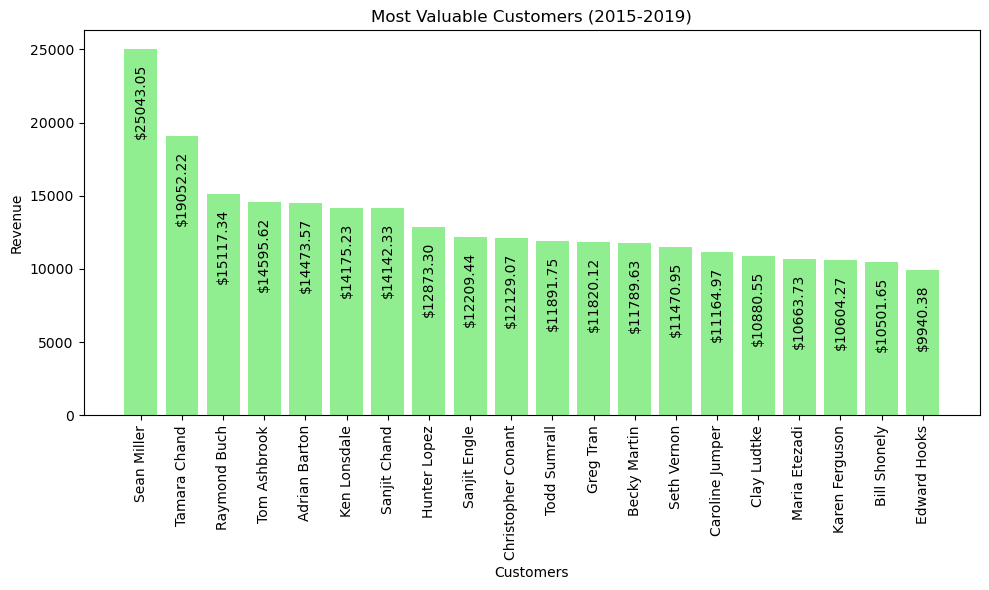

In [40]:
# Group by 'Customer Name' and sum the 'Sales' to get total revenue per customer
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort customers by total sales in descending order and select the top 20
top_customers = customer_sales.sort_values(by='Sales', ascending=False).head(20)

# Plot the chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_customers['Customer Name'], top_customers['Sales'], color='lightgreen')

# Adding values inside the bars and rotate them by 90 degrees
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 1000, f'${yval:.2f}', ha='center', va='top', fontsize=10, rotation=90, color='black')

# Adding titles and labels
plt.title('Most Valuable Customers (2015-2019)')
plt.xlabel('Customers')
plt.ylabel('Revenue')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

# **Customers with the highest purchase rate**

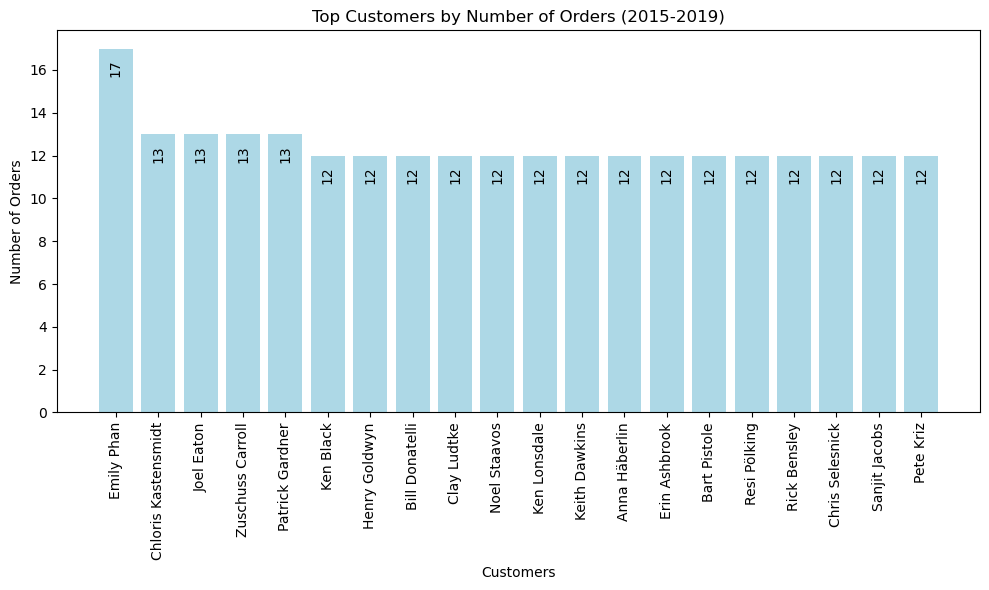

In [41]:
# Group by 'Customer Name' and count the number of orders (i.e., purchase rate)
customer_orders = df.groupby('Customer Name')['Order ID'].nunique().reset_index()

# Rename the columns for clarity
customer_orders.columns = ['Customer Name', 'Number of Orders']

# Sort customers by the number of orders in descending order and select the top 20
top_customers_by_orders = customer_orders.sort_values(by='Number of Orders', ascending=False).head(20)

# Plot the chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_customers_by_orders['Customer Name'], top_customers_by_orders['Number of Orders'], color='lightblue')

# Adding values inside the bars and rotate them by 90 degrees
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f'{yval:.0f}', ha='center', va='top', fontsize=10, rotation=90, color='black')

# Adding titles and labels
plt.title('Top Customers by Number of Orders (2015-2019)')
plt.xlabel('Customers')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

# **Top Customer by Purchase Rate in Each State**

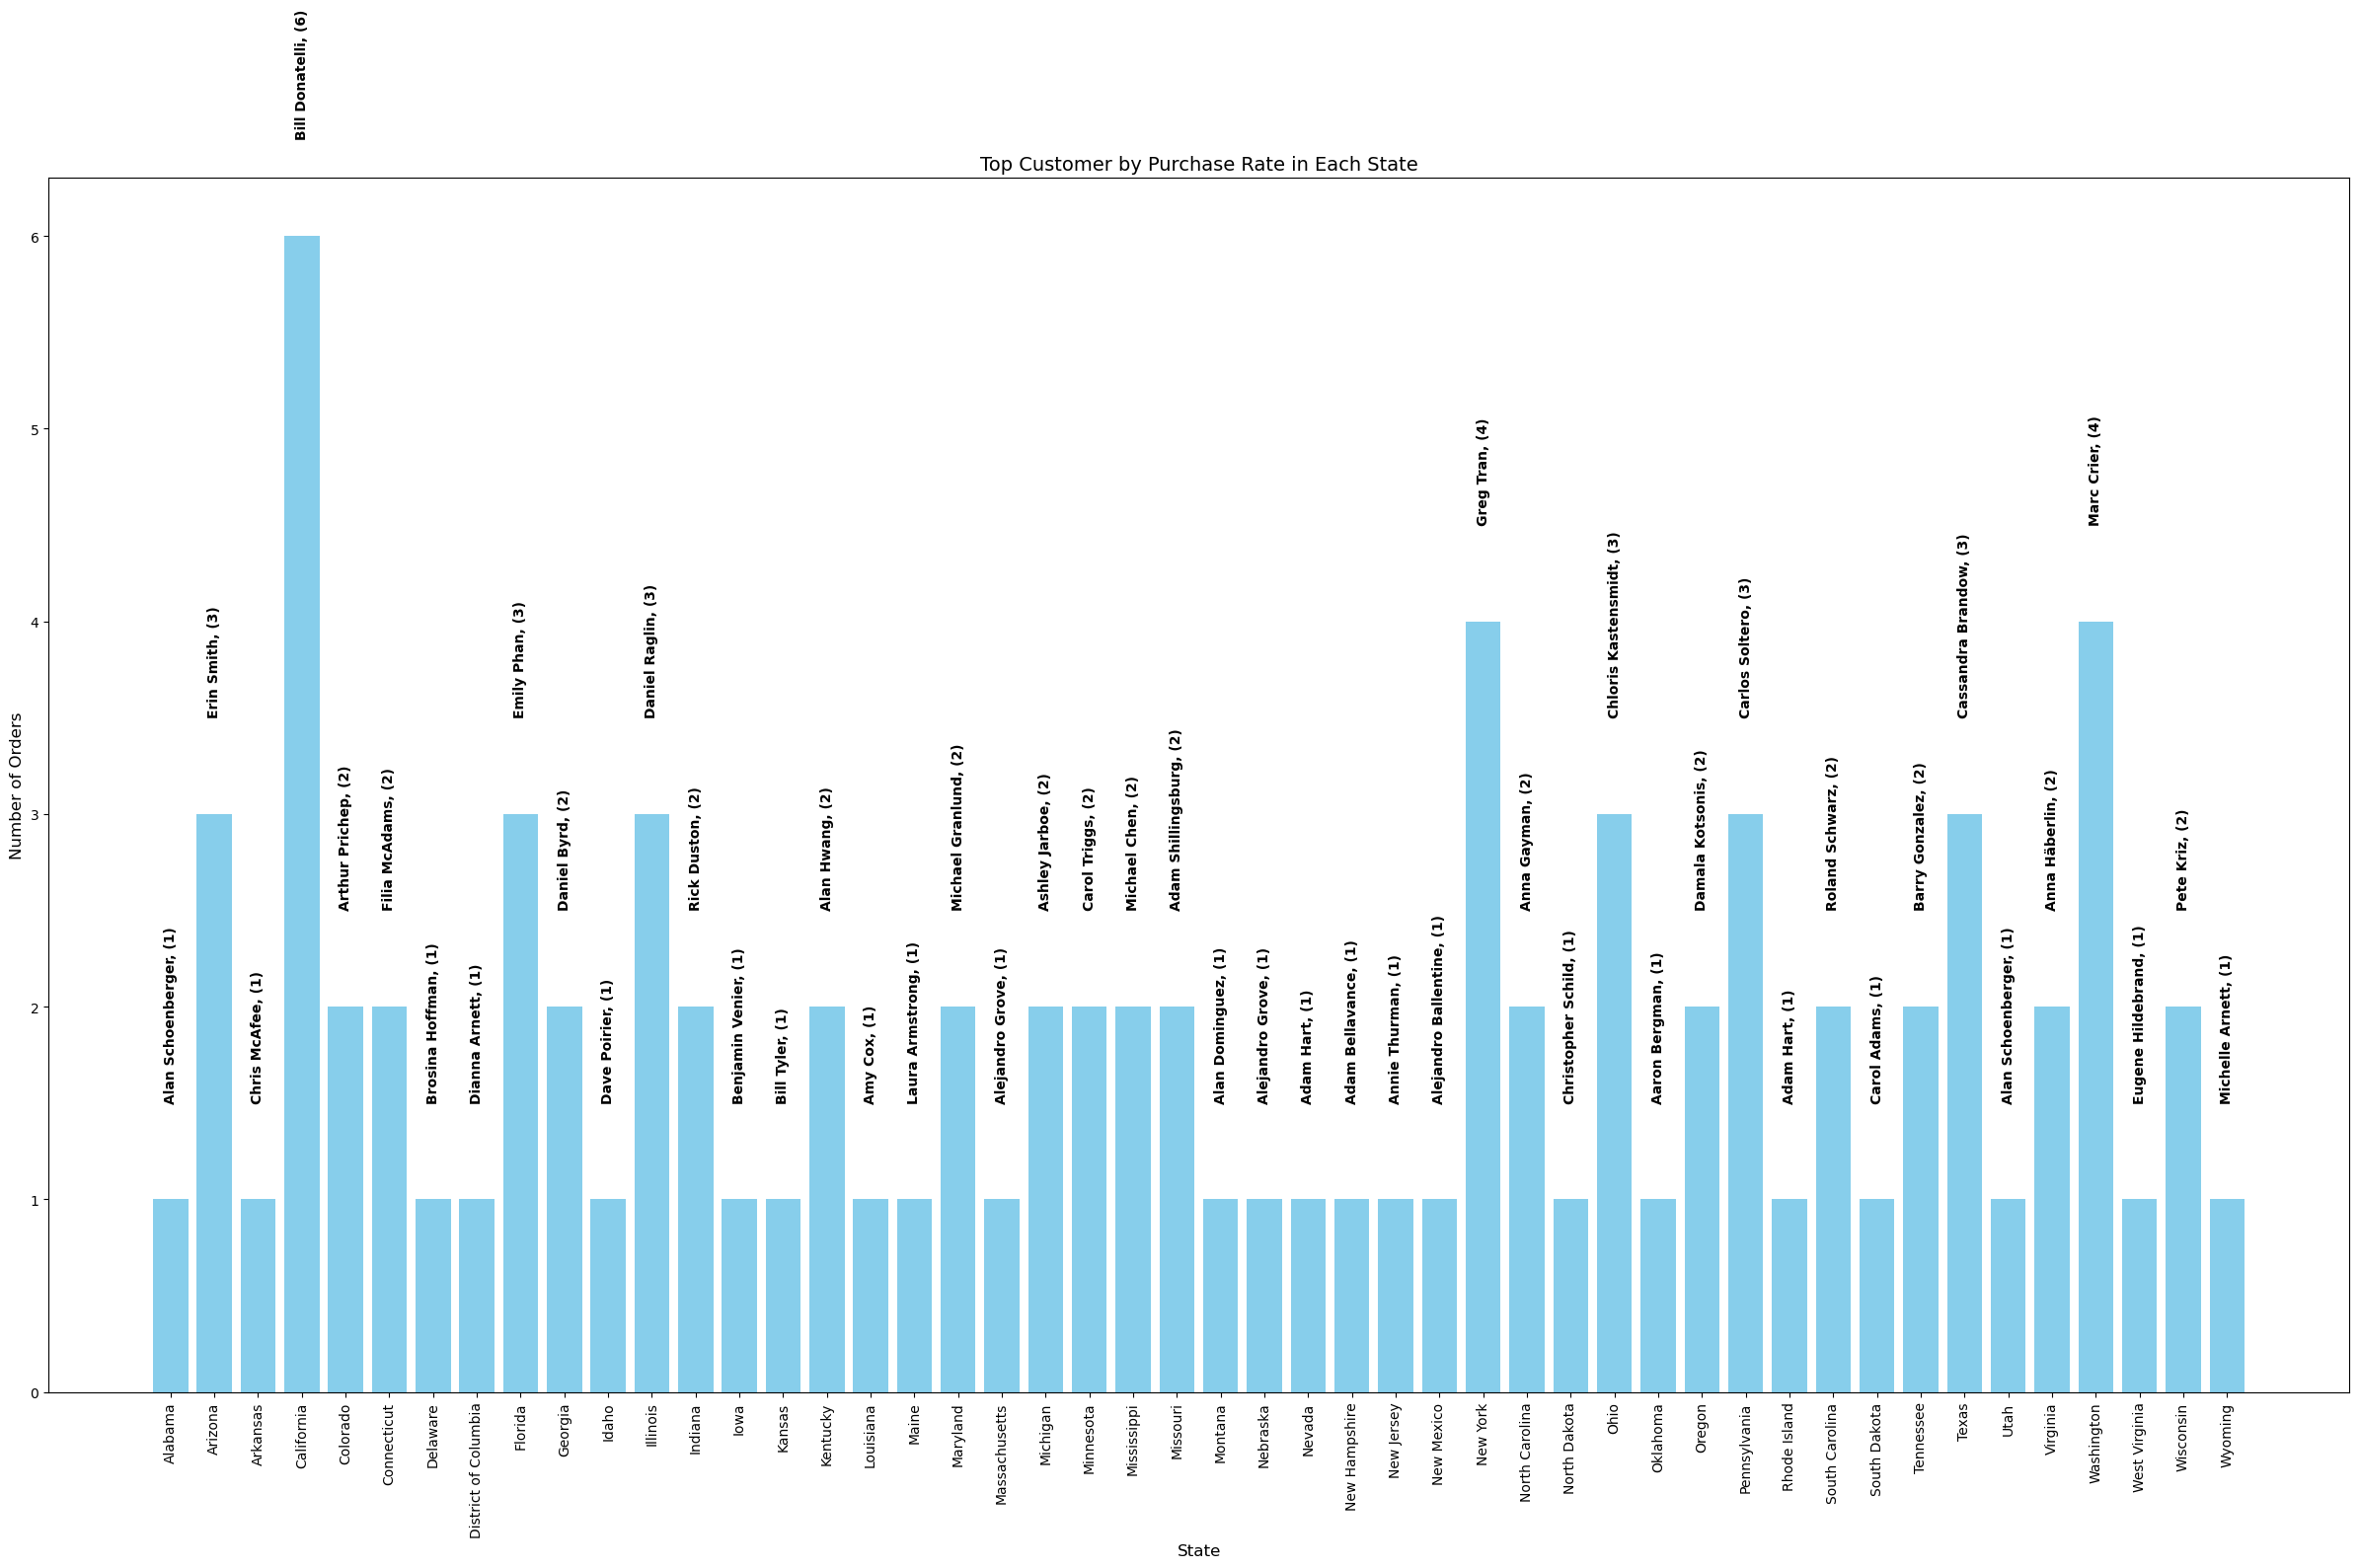

In [52]:
# Group by 'State' and 'Customer Name' and count unique 'Order ID' (purchase rate)
state_customer_orders = df.groupby(['State', 'Customer Name'])['Order ID'].nunique().reset_index()

# Rename columns for clarity
state_customer_orders.columns = ['State', 'Customer Name', 'Number of Orders']

# For each state, find the customer with the highest number of orders
top_customer_per_state = state_customer_orders.loc[state_customer_orders.groupby('State')['Number of Orders'].idxmax()]

# Sort by 'State' for better visualization
top_customer_per_state = top_customer_per_state.sort_values(by='State')

# Plot the bar chart
plt.figure(figsize=(24, 16))
bars = plt.bar(top_customer_per_state['State'], top_customer_per_state['Number of Orders'], color='skyblue')

# Add customer names and values at the end of the bars in 'Customer Name, (Number of Orders)' format
for bar, customer, orders in zip(bars, top_customer_per_state['Customer Name'], top_customer_per_state['Number of Orders']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{customer}, ({int(orders)})', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=90)

# Adding titles and labels
plt.title('Top Customer by Purchase Rate in Each State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

# **Inference**
* Three most popular states among the customers are California, New York and Texas.
* Majority of the customers prefer the Standard Class Shipping mode.
* Most of the customers are from Consumer Segment.
* Least of all orders from the southern region.
* Office Supplies take up most of the sales.
* Blinders and Paper are clear leaders in sales among customers.

# ***GEO ANALYSIS***

# Category Columns (Ship Mode, Segment, Category, Sub-Category)

In [39]:
# Make a copy of original table
data1 = df.copy()

# Split Ship Mode values in unique columns
for ship_mode in data1['Ship Mode'].unique():
    data1[ship_mode] = data1.loc[data1['Ship Mode'] == ship_mode]['Ship Mode']

# Group by State_abb and count
data1 = data1[['State_abb', 'Second Class', 'Standard Class', 'First Class', 'Same Day']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head()

,State_abb,Second Class,Standard Class,First Class,Same Day
0,AL,18,33,9,1
1,AR,10,38,10,2
2,AZ,27,138,42,16
3,CA,386,1129,314,117
4,CO,33,96,44,6


In [36]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ["Second Class", "Standard Class", "First Class", "Same Day"]

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Shipping Mode Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [40]:
# Make a copy of original table
data1 = df.copy()

# Split Ship Mode values in unique columns
for segment in data1['Segment'].unique():
    data1[segment] = data1.loc[data1['Segment'] == segment]['Segment']

# Group by State_abb and count
data1 = data1[['State_abb', 'Consumer', 'Corporate', 'Home Office']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head()

,State_abb,Consumer,Corporate,Home Office
0,AL,25,28,8
1,AR,37,14,9
2,AZ,109,69,45
3,CA,1020,601,325
4,CO,92,57,30


In [41]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Consumer', 'Corporate', 'Home Office']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Segment Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [42]:
# Make a copy of original table
data1 = df.copy()

# Split Ship Mode values in unique columns
for category in data1['Category'].unique():
    data1[category] = data1.loc[data1['Category'] == category]['Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Furniture', 'Office Supplies', 'Technology']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head()

,State_abb,Furniture,Office Supplies,Technology
0,AL,11,36,14
1,AR,9,36,15
2,AZ,49,126,48
3,CA,430,1167,349
4,CO,50,94,35


In [43]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Furniture', 'Office Supplies', 'Technology']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*2,
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [44]:
# Make a copy of original table
data1 = df.copy()

# Split Ship Mode values in unique columns
for category in data1['Sub-Category'].unique():
    data1[category] = data1.loc[data1['Sub-Category'] == category]['Sub-Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head()

,State_abb,Bookcases,Chairs,Labels,Tables,Storage,Furnishings,Art,Phones,Binders,Appliances,Paper,Accessories,Envelopes,Fasteners,Supplies,Machines,Copiers
0,AL,0,5,2,3,3,3,7,6,10,1,8,6,2,1,2,1,1
1,AR,1,2,1,1,2,5,6,4,10,0,12,11,3,2,0,0,0
2,AZ,3,16,3,9,21,21,13,23,35,6,31,22,7,6,4,3,0
3,CA,51,126,80,69,159,184,162,168,267,91,281,143,45,41,41,23,15
4,CO,9,14,2,4,12,23,11,16,28,9,18,15,5,4,5,3,1


In [45]:
fig = go.Figure()

columns = ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*5,
                 #color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Sub-Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

#Inference:
* California, New York, Texas, Washington and Pennsylvania are Top 5 States by Total Sales. At the same time, California and New York are leaders with a significant difference in sales compared to the rest of the states.
* Despite the fact that Texas is in the top 3 in terms of sales, the state suffers the largest loss in gross profit among all.
* Ohio, Pennsylvania and Illinois also bear big losses in profit.
* California, New York and Washington have the highest gross profit values of all states
* For the most part, the distribution of Shipping Modes by state is the same as in all data, no obvious deviations are observed.
* For the most part, the distribution of Customers Segments by state is the same as in all data. However, in some cases like in Wisconsin Consumer Semgent is not the most popular.
* For the most part, the distribution of Categories and Sub-Categories by state is the same as in all data, no obvious deviations are observed.

# Analysis of Order Count Distribution Across Various Categories.

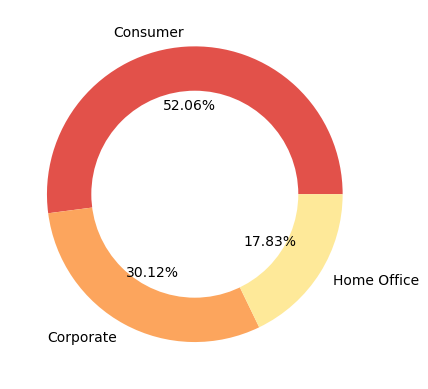

In [46]:
segment=df['Segment'].value_counts().index
count=df['Segment'].value_counts().values
circle=plt.Circle((0,0),0.70,fc='white')
plt.pie(count,labels=segment,colors=sns.color_palette("Spectral"),
       autopct='%1.2f%%')
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.show()

# Obsevation:
Around 50% of customers in the dataset are classified as consumers, indicating a significant portion of individual buyers among the customer base.

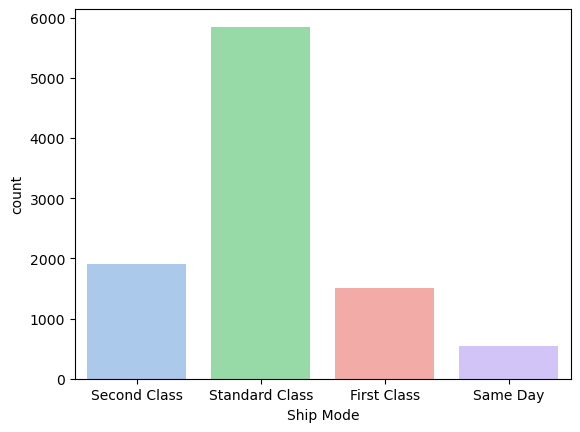

In [47]:
sns.countplot(data=df,x='Ship Mode',palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'])
plt.show()

# Observation :
The majority of customers prefer the standard class ship mode compared to other options like first class, second class, or same day.



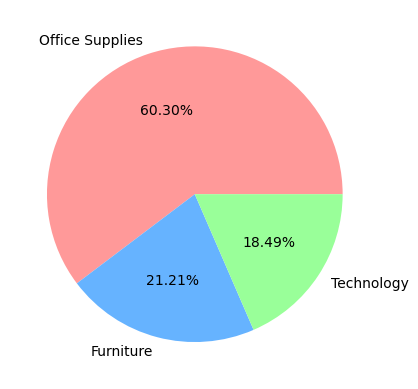

In [48]:
segment=df['Category'].value_counts().index
count=df['Category'].value_counts().values
plt.pie(count,labels=segment,
       autopct='%1.2f%%',colors = ['#ff9999','#66b3ff','#99ff99'])
plt.show()

# Observation :
* Above 50% of customers in the dataset place orders for office supplies.

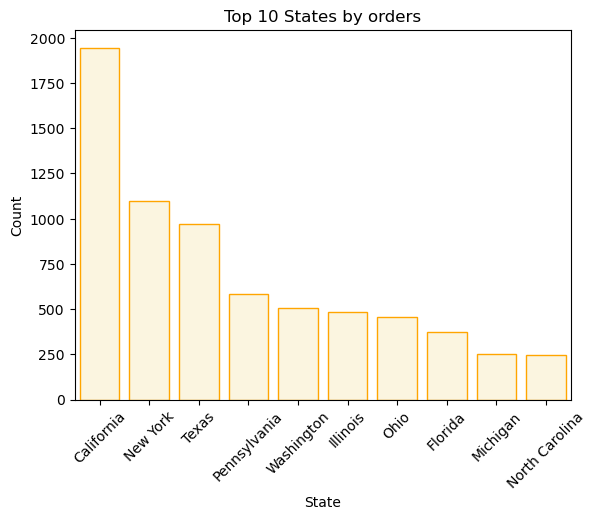

In [49]:
state=df['State'].value_counts().index[:10]
count=df['State'].value_counts().values[:10]
sns.barplot(x=state,y=count,color= '#FFF8DC',edgecolor='orange')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States by orders')
plt.show()

# Observation:
The plot above displays the top 10 cities by some metric, with California standing out as having the highest number.



# ***Analysis of Sales Distribution ***
This title conveys that you have conducted an analysis based on the sales column, comparing it with different categories.

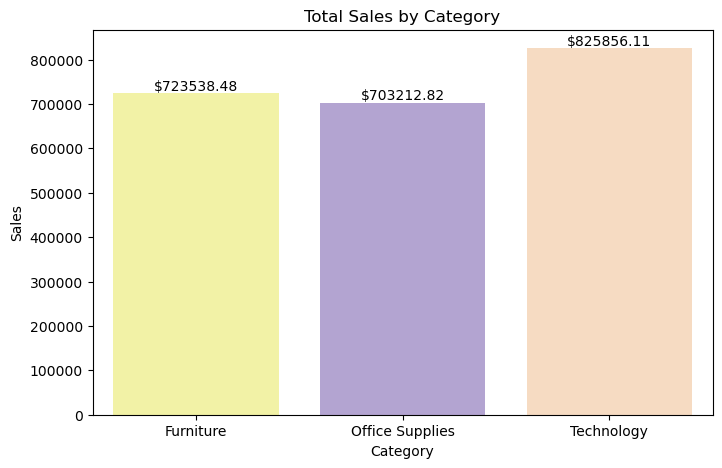

In [50]:
cat_s=df.groupby("Category")["Sales"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=cat_s,x="Category",y="Sales",palette=["#FFFF99", "#B19CD9", "#FFDAB9"])

for index, row in cat_s.iterrows():
    plt.annotate(f"${row['Sales']:.2f}", (index, row['Sales']), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.show()

# Observation
The plot above depicts the sales distribution across different regions, highlighting the West region as the leader in terms of sales.

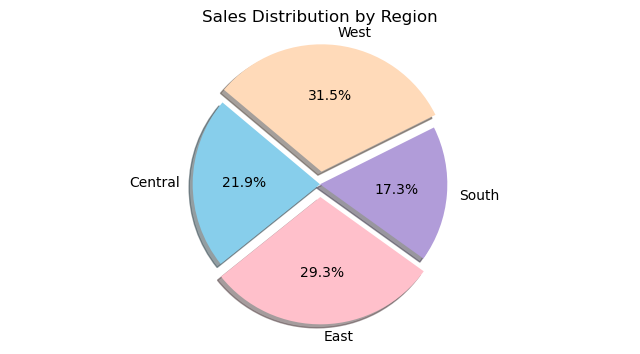

In [51]:
reg_s=df.groupby("Region")["Sales"].sum().reset_index()
sales=reg_s["Sales"].tolist()
regions=reg_s["Region"].tolist()

plt.figure(figsize=(8,4))
plt.pie(sales, labels=regions,
        autopct='%1.1f%%',
        colors=["#87CEEB", "#FFC0CB", "#B19CD9", "#FFDAB9"],
        shadow=True,
        explode = [0, 0.1, 0, 0.1],
        startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()


# Observation
* The plot above illustrates the distribution of sales by region.
* The West region stands out with the highest sales.

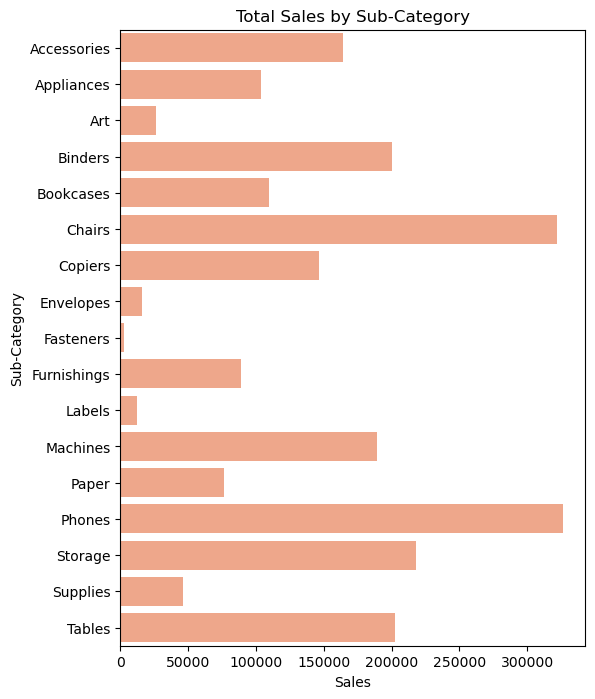

In [52]:
scat_s=df.groupby("Sub-Category")["Sales"].sum().reset_index()

plt.figure(figsize=(6,8))
sns.barplot(data=scat_s,y="Sub-Category",x="Sales",color="#FFA07A")
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')
plt.show()

# Observation:
* Chairs and Tables have high sales, both around $300,000.


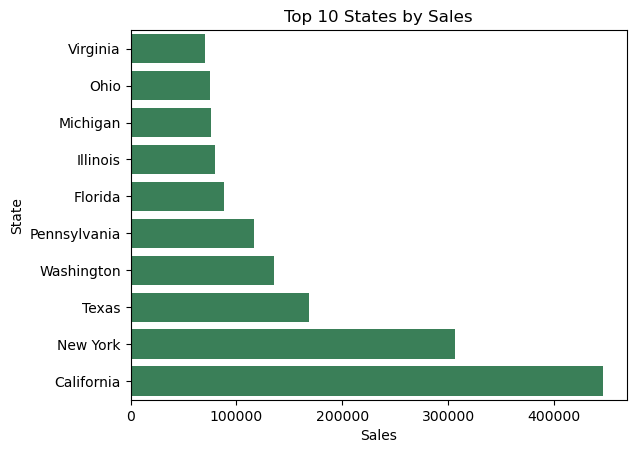

In [53]:
sta_s=df.groupby("State")["Sales"].sum().reset_index()
sta_s=sta_s.sort_values(by="Sales")
sta_s=sta_s.tail(10)

sns.barplot(data=sta_s,y="State",x="Sales",color="seagreen")
plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Top 10 States by Sales')
plt.show()

# Observation:
The distribution of sales across states reveals a notable disparity, with California and New York leading in sales volume, suggesting strong market presence and economic activity

# Best-Selling Products by Category and Sub-Category

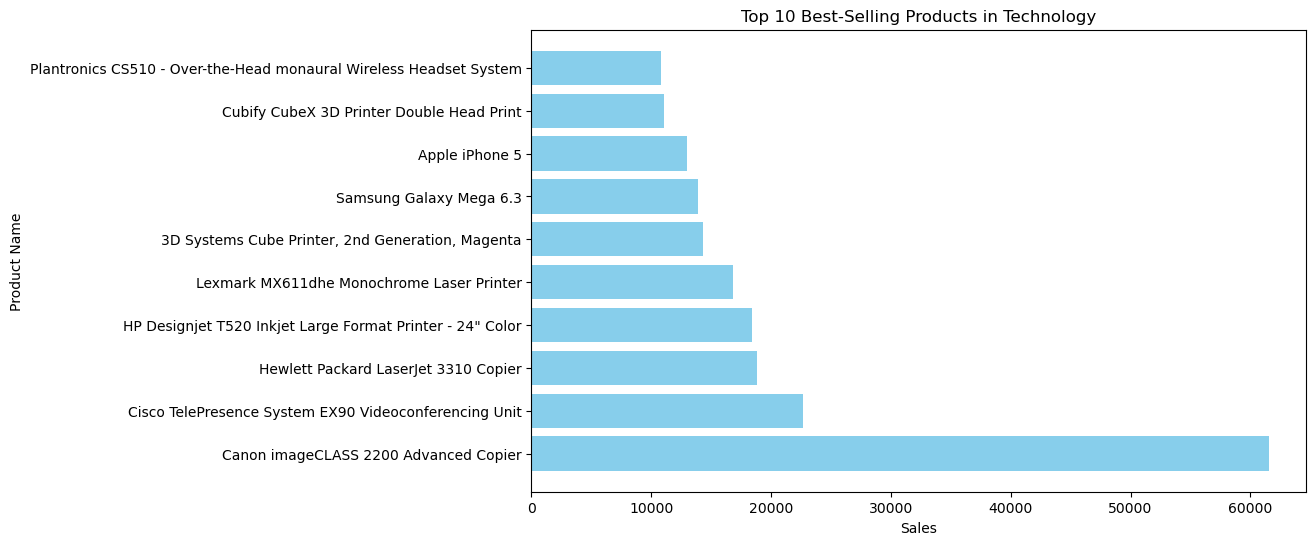

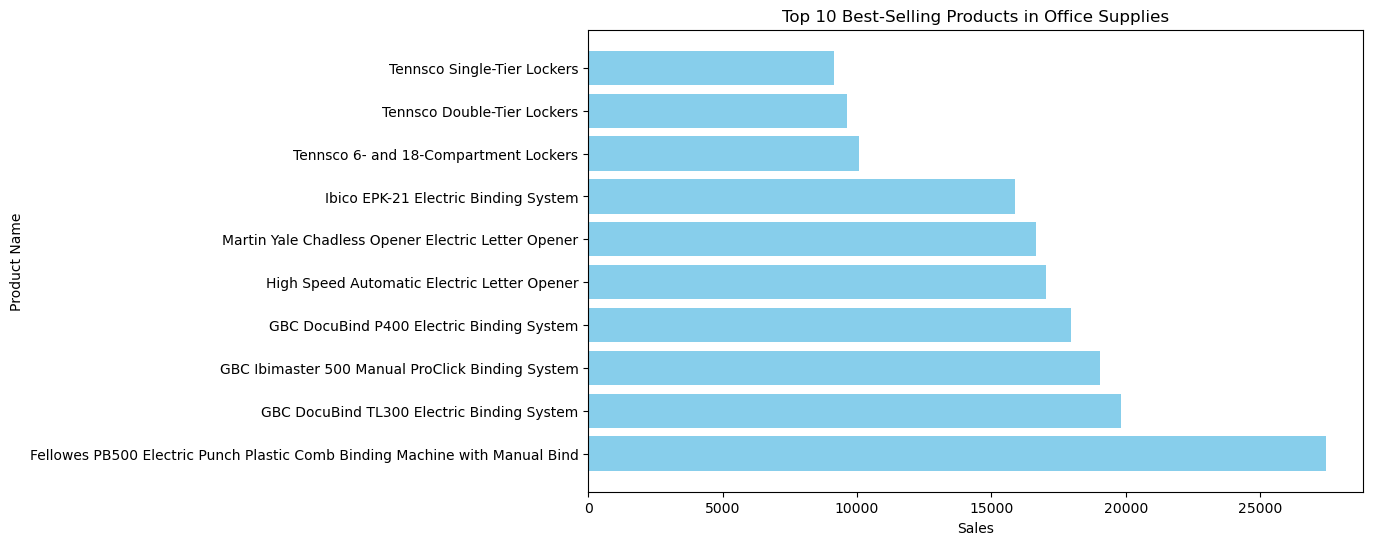

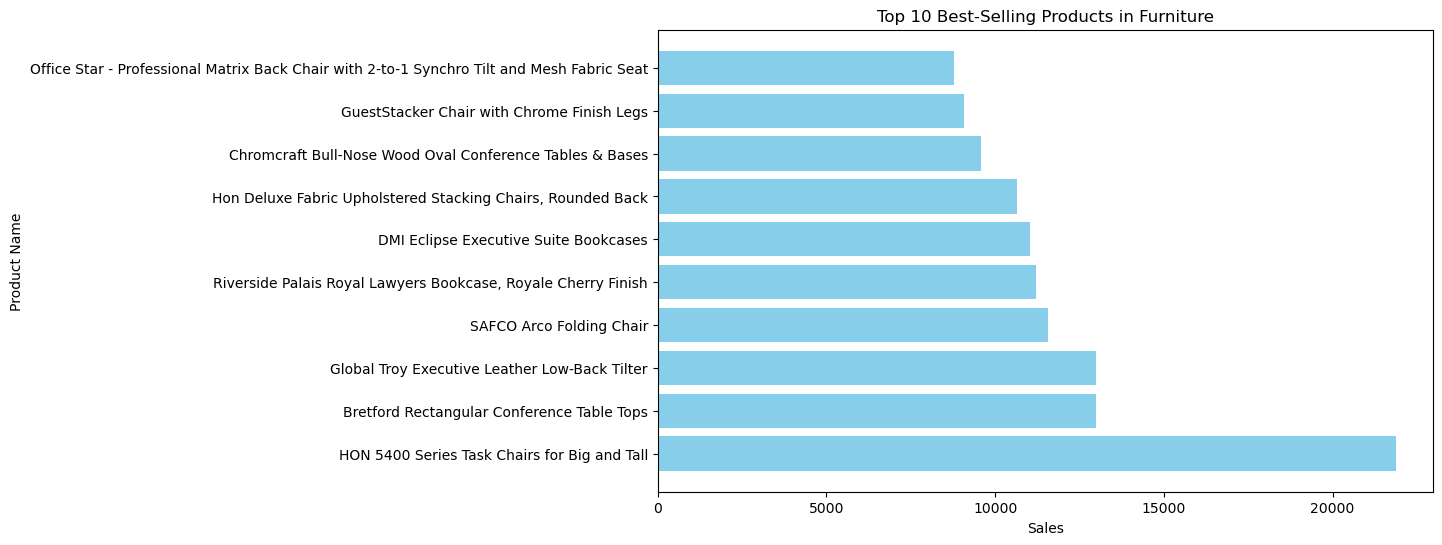

In [54]:

top_products = df.groupby(['Category', 'Sub-Category', 'Product Name'])['Sales'].sum().reset_index()
top_10_products = top_products.sort_values('Sales', ascending=False).groupby('Category').head(10)

# Plotting the top 10 best-selling products for each category
for category in top_10_products['Category'].unique():
    plt.figure(figsize=(10,6))
    category_data = top_10_products[top_10_products['Category'] == category]
    plt.barh(category_data['Product Name'], category_data['Sales'], color='skyblue')
    plt.title(f'Top 10 Best-Selling Products in {category}')
    plt.xlabel('Sales')
    plt.ylabel('Product Name')
    plt.show()

# **Time series analysis**

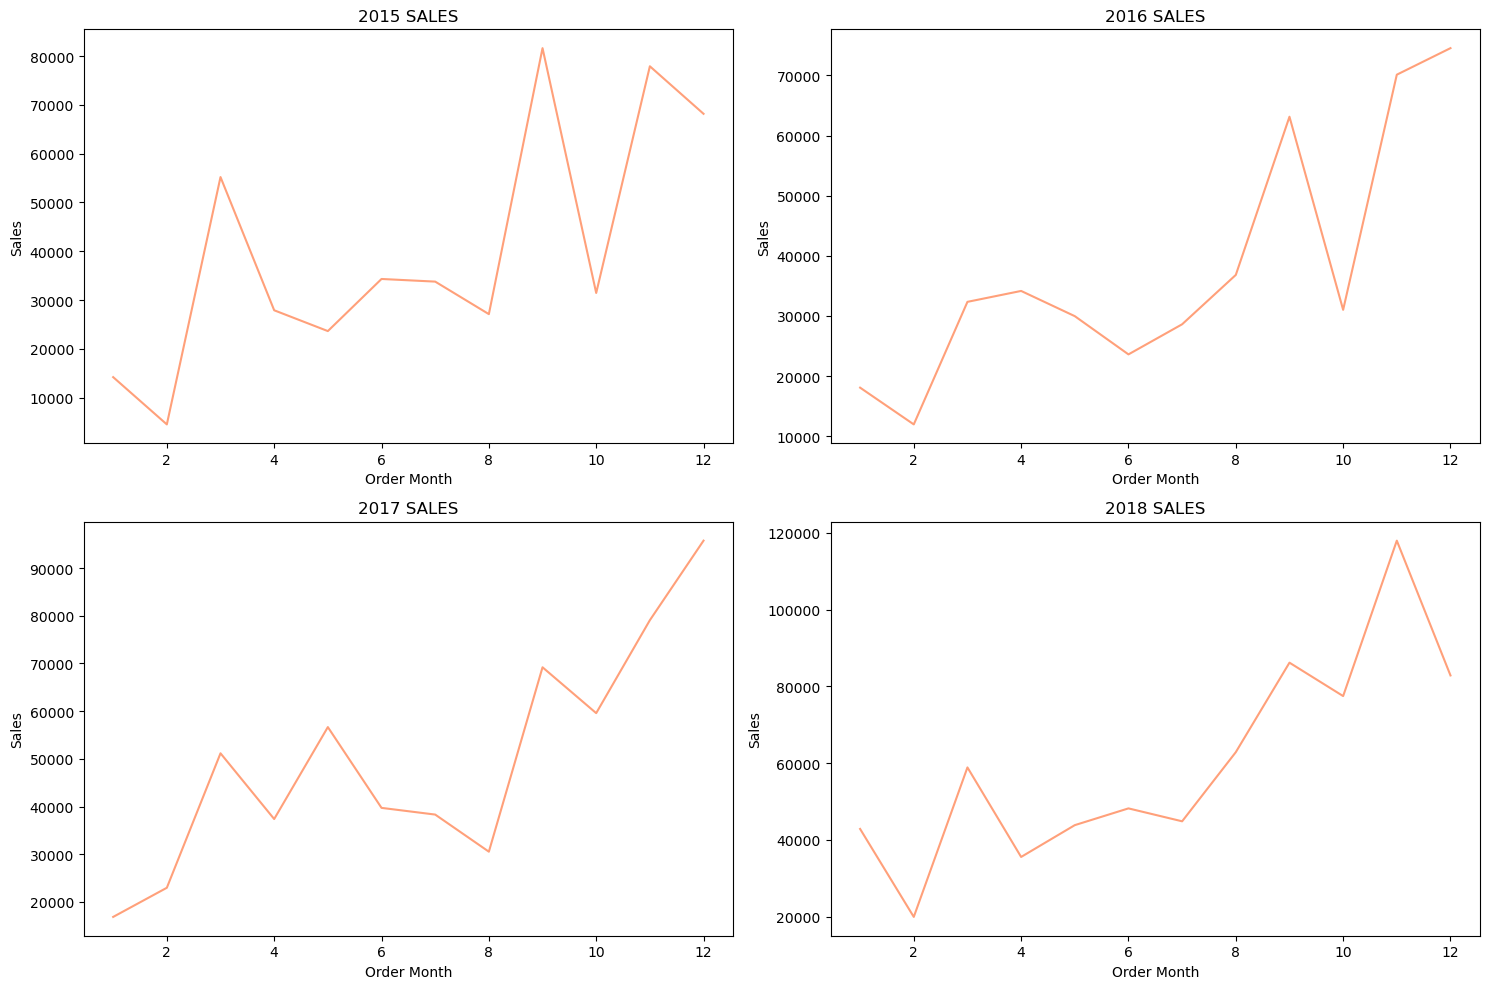

In [55]:
years = df["order_year"].unique()
years=sorted(years)

num_rows = (len(years) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, year in enumerate(years):
    ym = df[df["order_year"] == year].groupby("order_month")["Sales"].sum().reset_index()

    #sns.set()
    row = i // num_cols
    col = i % num_cols
    axes[row, col].plot(ym["order_month"], ym["Sales"], color="#FFA07A")
    axes[row, col].set_title("{} SALES".format(year))
    axes[row, col].set_xlabel("Order Month")
    axes[row, col].set_ylabel("Sales")

plt.tight_layout()
plt.show()

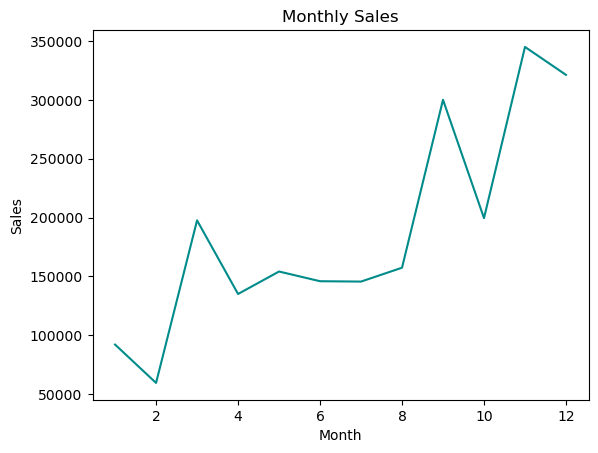

In [56]:
m= df.groupby("order_month")["Sales"].sum().reset_index()
plt.plot(m["order_month"], m["Sales"], color="#008B8B")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [57]:
# Grouping by order_year and order_month and summing up the sales
monthly_sales = df.groupby(['order_year', 'order_month']).agg({'Sales': 'sum'}).reset_index()

# Formatting the month-year for better display
monthly_sales['Month-Year'] = monthly_sales['order_month'].astype(str) + '-' + monthly_sales['order_year'].astype(str)

# Sorting the data by month-year
monthly_sales = monthly_sales.sort_values(['order_year', 'order_month'])

# Creating the plot
fig = px.line(monthly_sales, x='Month-Year', y='Sales', title='Monthly Sales',
              labels={'Month-Year': 'Month-Year', 'Sales': 'Sales'})

# Customizing hover template
fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')

# Rotating x-axis labels for better readability
fig.update_xaxes(tickangle=90)

fig.show()

# Observation:
* Trend: The sales exhibit an upward trend from around August 2019 onwards, peaking at the end of 2020.
* Fluctuations: While there are fluctuations, the overall trajectory is positive.
* Seasonal Patterns: There seems to be a seasonal component, with sales consistently rising towards the end of each year. ### Overall, the sales data suggests a positive trajectory with substantial growth during the observed period

# **Sales Distribution**

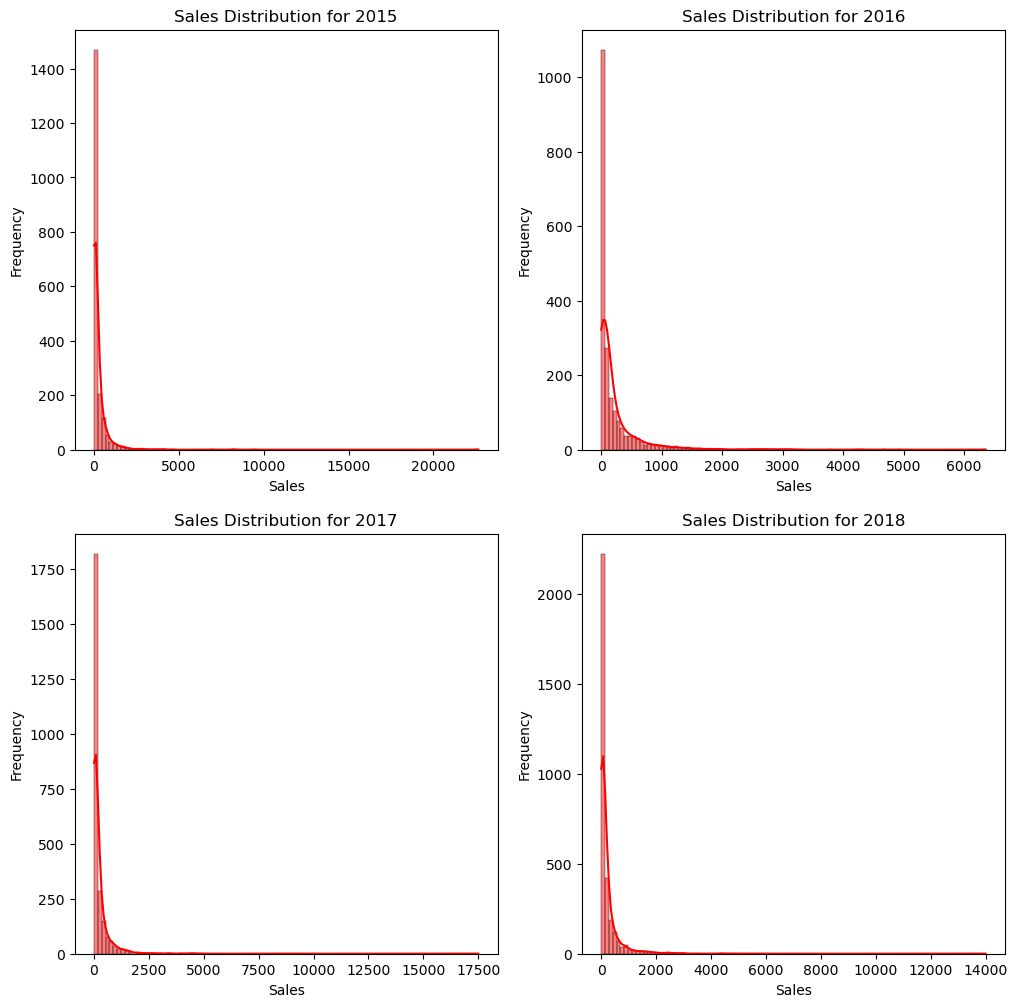

In [58]:
num_rows = (len(years) + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 12))

for i, year in enumerate(years):
    df1 = df[df["order_year"] == year]
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df1['Sales'], bins=100, kde=True, color="red")
    plt.title(f'Sales Distribution for {year}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')

plt.show()

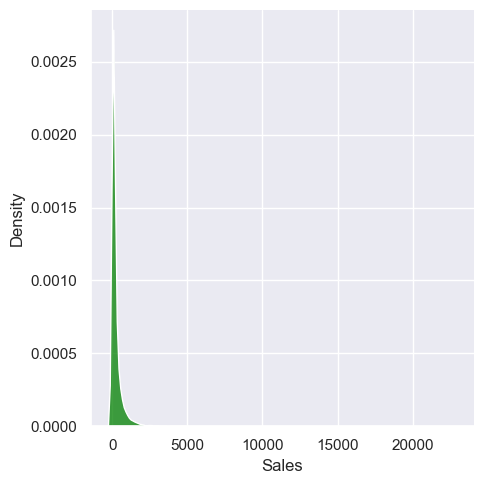

In [59]:
sns.set()
sns.displot(df, x="Sales", kind="kde", multiple="stack",color='green')
plt.show()

# Observation :
Based on the distribution plots, it appears that sales were concentrated at lower values across all years.

# **Analysis based on Orders**

In [60]:
df4=df.groupby(["order_year","Region"]).size().reset_index(name='Count')
custom_colors = px.colors.qualitative.Plotly[4:8]
fig = px.bar(df4, x='order_year', y='Count',
             color='Region',
             barmode='group',
             title='Orders over Region by Year',
            color_discrete_sequence=custom_colors)
fig.show()

In [61]:
df2=df.groupby(["order_year","Category"]).size().reset_index(name='Count')
fig = px.bar(df2, x='order_year', y='Count',
             color='Category',
             barmode='group',
             title='Count of Categories by Year')
fig.show()

In [62]:
df3=df.groupby(["Category","Sub-Category"]).size().reset_index(name='Count')
fig = px.bar(df3, x='Category', y='Count', color='Sub-Category',
             title='Counts of Sub-Categories within Main Categories',
             labels={'Count': 'Number of Items Sold'},
             barmode='group')
fig.show()

# **Conclusion**

* **Through time series analysis, we identified seasonal trends and fluctuations in sales, providing valuable insights into the dynamics of consumer behavior within the Superstore dataset.**

* **The geographical analysis revealed regional disparities in sales distribution, highlighting areas of strength and opportunities for improvement in market penetration and customer engagement strategies.**

# Displaying all of Segment,Region,Category,Sub-Category due to Sales

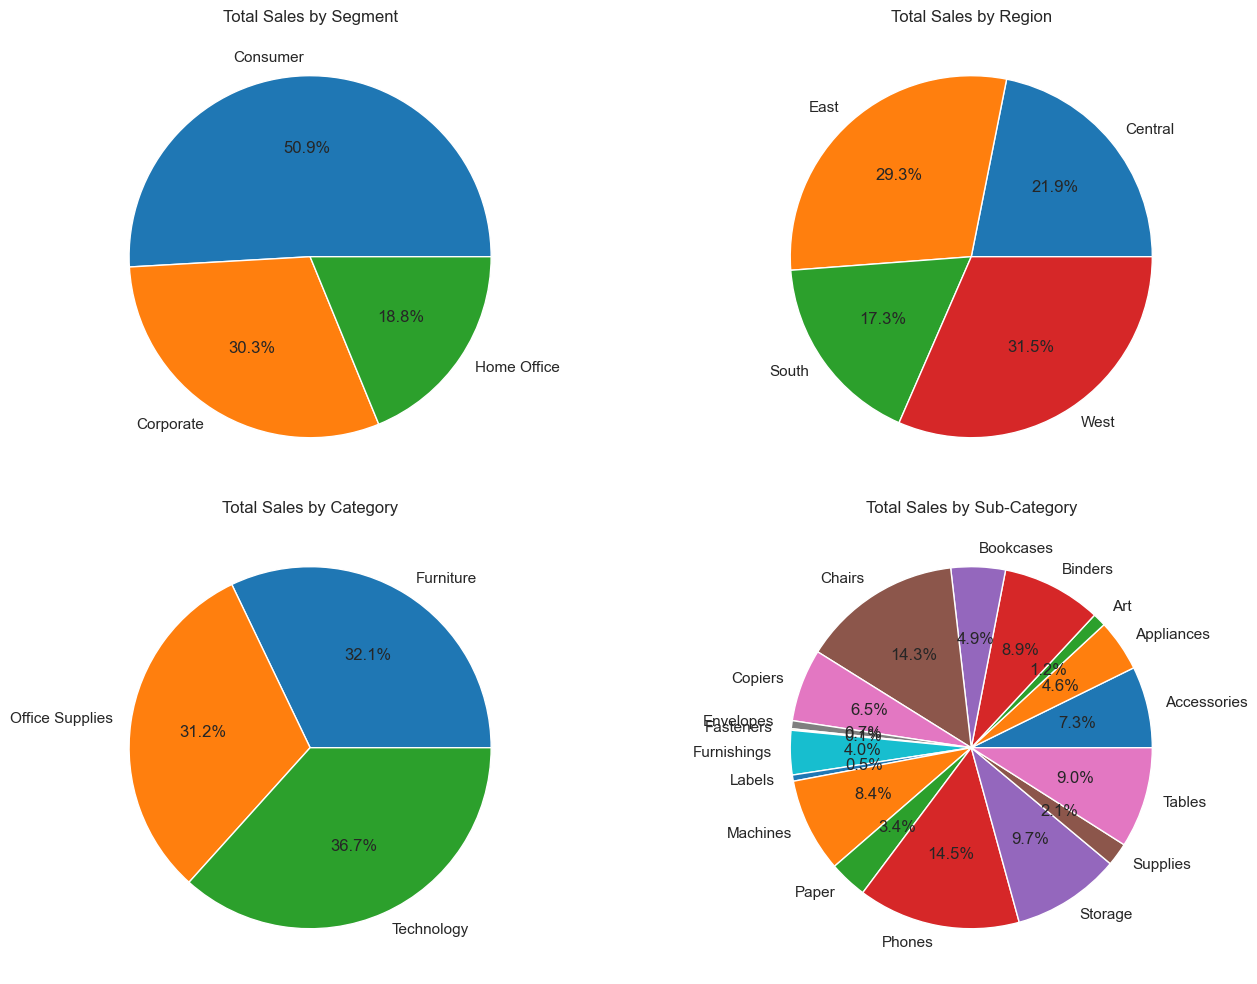

In [63]:
# Sort the DataFrame by 'Sales' in descending order
sl = df.sort_values(by='Sales', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Segment', 'Region', 'Category', 'Sub-Category']

# Assuming `columns` is a list of the columns you want to plot
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]

    # Group data by the column and sum up sales
    grouped_data = sl.groupby(column)['Sales'].sum()


    ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)

    # Set title
    ax.set_title(f'Total Sales by {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Best-Selling Products by Category and Sub-Category:

In [64]:
sl_summary = sl.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sl_summary

,Category,Sub-Category,Sales
0,Furniture,Bookcases,109408.2987
1,Furniture,Chairs,322107.5310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104075.4630
5,Office Supplies,Art,26697.3700
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16126.0060
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


In [65]:
# Create a nested pie chart
fig = px.sunburst(
    sl_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)
fig.show()

 # Insight:
 *  Identify the top 10 best-selling products by Sales within each Category and Sub-Category. This will help understand which products drive the most revenue in each segment.


# Action:
  * Use this to optimize inventory and focus marketing efforts on high-performing products.

# ***Analysis of Order Count Distribution Across Various Categories:***

In [66]:
order_count_by_category = df.groupby('Category')['Order ID'].nunique().reset_index()
order_count_by_category.columns = ['Category', 'Order Count']

# Step 2: Sort values to make the plot more readable
order_count_by_category = order_count_by_category.sort_values(by='Order Count', ascending=False)

# Display the result
print(order_count_by_category)

          Category  Order Count
1  Office Supplies         3674
0        Furniture         1725
2       Technology         1516


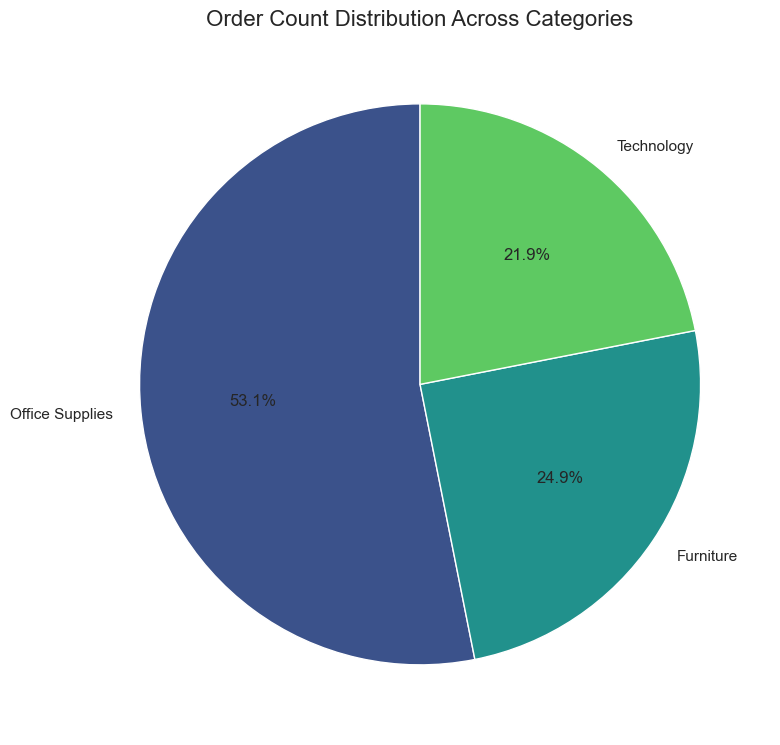

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(order_count_by_category['Order Count'], labels=order_count_by_category['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(order_count_by_category)))

# Add a title
plt.title('Order Count Distribution Across Categories', fontsize=16)

plt.tight_layout()
plt.show()

# **Actionable Insights:**

* Popular Categories: The categories with the highest order counts are the most popular among customers.

* Demand Forecasting: You can focus on ensuring that the popular categories are well-stocked to meet demand.      

* Marketing Strategy: Categories with lower order counts might need more marketing efforts or promotions to boost demand.

# Shipping Delay Impact on Sales:

In [68]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
same_day_shipments = df[df['Ship Mode'] == 'Same Day']
standard_class_shipments = df[df['Ship Mode'] == 'Standard Class']
first_class_shipments = df[df['Ship Mode'] == 'First Class']
second_class_shipments = df[df['Ship Mode'] == 'Second Class']

same_day_shipments_sorted = same_day_shipments.sort_values(by='Sales', ascending=False)
first_class_shipments_sorted = first_class_shipments.sort_values(by='Sales', ascending=False)
second_class_shipments_sorted = second_class_shipments.sort_values(by='Sales', ascending=False)
standard_class_shipments_sorted = standard_class_shipments.sort_values(by='Sales', ascending=False)

print(same_day_shipments_sorted[['Order Date', 'Ship Date', 'Shipping Delay','Ship Mode','Sales']].head())
print(first_class_shipments_sorted[['Order Date', 'Ship Date', 'Shipping Delay','Ship Mode','Sales']].head())
print(second_class_shipments_sorted[['Order Date', 'Ship Date', 'Shipping Delay','Ship Mode','Sales']].head())
print(standard_class_shipments_sorted[['Order Date', 'Ship Date', 'Shipping Delay','Ship Mode','Sales']].head())

     Order Date  Ship Date  Shipping Delay Ship Mode    Sales
683  2018-11-04 2018-11-04               0  Same Day  7999.98
8204 2016-11-08 2016-11-08               0  Same Day  4643.80
5126 2015-09-14 2015-09-14               0  Same Day  2799.96
1438 2016-10-15 2016-10-15               0  Same Day  2453.43
6901 2018-07-24 2018-07-24               0  Same Day  2399.96
     Order Date  Ship Date  Shipping Delay    Ship Mode      Sales
8153 2018-03-23 2018-03-25               2  First Class  13999.960
2623 2018-10-22 2018-10-24               2  First Class  11199.968
4218 2018-04-01 2018-04-03               2  First Class   4799.984
353  2017-09-01 2017-09-03               2  First Class   4355.168
6014 2017-03-10 2017-03-11               1  First Class   4158.912
     Order Date  Ship Date  Shipping Delay     Ship Mode     Sales
8488 2017-02-02 2017-02-04               2  Second Class  8749.950
2505 2015-07-25 2015-07-27               2  Second Class  8187.650
6520 2018-01-16 2018-01-1

In [69]:
# Step 2: Group by Shipping Delay and calculate total Sales
shipping_delay_sales = df.groupby('Shipping Delay')['Sales'].sum().reset_index()

# Sort by Shipping Delay for better visualization
shipping_delay_sales = shipping_delay_sales.sort_values(by='Shipping Delay')

# Display the result
print(shipping_delay_sales)

   Shipping Delay        Sales
0               0  121763.6050
1               1   66700.1152
2               2  358138.5240
3               3  200585.1472
4               4  613530.6293
5               5  492005.1197
6               6  235709.8818
7               7  164174.3905


In [70]:
# Step 3: Identify repeat customers by counting the number of orders for each customer
customer_orders = df.groupby('Customer ID').size().reset_index(name='Order Count')

# Merge the customer order count back into the original dataframe
df = df.merge(customer_orders, on='Customer ID')

# Now, analyze the average shipping delay for repeat customers (those with more than 1 order)
repeat_customer_delay = df[df['Order Count'] > 1].groupby('Customer ID')['Shipping Delay'].mean().reset_index()

# Display the result
print(repeat_customer_delay)

    Customer ID  Shipping Delay
0      AA-10315        4.818182
1      AA-10375        3.266667
2      AA-10480        5.416667
3      AA-10645        3.888889
4      AB-10015        2.166667
..          ...             ...
782    XP-21865        4.892857
783    YC-21895        3.875000
784    YS-21880        4.750000
785    ZC-21910        4.483871
786    ZD-21925        3.777778

[787 rows x 2 columns]


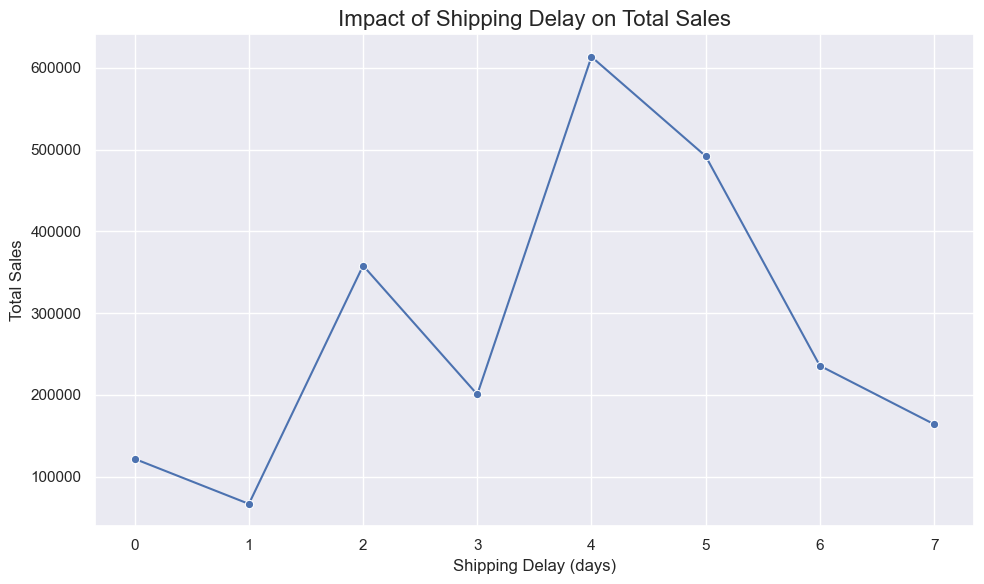

In [71]:
# Step 4: Plot Shipping Delay vs Total Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Shipping Delay', y='Sales', data=shipping_delay_sales, marker='o')

# Add titles and labels
plt.title('Impact of Shipping Delay on Total Sales', fontsize=16)
plt.xlabel('Shipping Delay (days)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()
plt.show()

# PRODUCT ANALYSIS

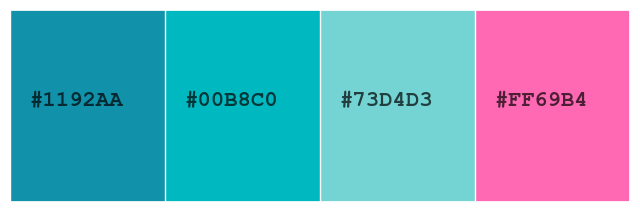

In [72]:
# creating a custom palette
colors = ['#1192AA','#00B8C0', '#73D4D3', '#FF69B4']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha =0.7)
plt.gcf().set_facecolor('white')

plt.show()

# Total Sales

In [73]:
# import make_subplots function to create subplot
from plotly.subplots import make_subplots

## CREATE NEW TABLE
# group by category
sales_per_category = df[['Category', 'Sales']].groupby('Category').sum()

# sort values by Sales
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_category['cumperc'] = sales_per_category.cumsum()/sales_per_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_category.index,
           y = sales_per_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_category.index,
               y = sales_per_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

In [74]:
## CREATE NEW TABLE
# group by sub-category
sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').sum()

# sort values by Sales
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_sub_category['cumperc'] = sales_per_sub_category.cumsum()/sales_per_sub_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_sub_category.index,
           y = sales_per_sub_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_sub_category.index,
               y = sales_per_sub_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Sub-Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

# Median Sales

In [75]:
## CREATE NEW TABLE
# group by category
median_sales_per_category = df[['Category', 'Sales']].groupby('Category').median()

# sort values by Sales
median_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_category.index,
             y = median_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [76]:
## CREATE NEW TABLE
# group by category
median_sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').median()

# sort values by Sales
median_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_sub_category.index,
             y = median_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Mean Sales

In [77]:
## CREATE NEW TABLE
# group by category
mean_sales_per_category = df[['Category', 'Sales']].groupby('Category').mean()

# sort values by Sales
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_category.index,
             y = mean_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [78]:
## CREATE NEW TABLE
# group by category
mean_sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').mean()

# sort values by Sales
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_sub_category.index,
             y = mean_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Sales Boxplot

In [79]:
# boxplot
fig = go.Figure(
    go.Box(x = df['Category'],
           y = df['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Sales by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

In [80]:
# boxplot
fig = go.Figure(
    go.Box(x = df['Sub-Category'],
           y = df['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Sales by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show()

# **Inference**
* Total Sales by Category fairly evenly distributed.
* Phones and Chairs make up almost 30% of all sales.
* Median Sales value in the Office Supplies category is much less than in other categories. This is most likely due to the fact that prices for products from other categories are much higher.
* Considering Medial Sales value Copiers, Machines, Tables, Chairs, Bookcases are leading Sub-Categories.
* Mean Sales value in the Office Supplies category is much less than in other categories.
* Considering Mean Sales value Copiers, Machines, Tables, Chairs, Bookcases are leading Sub-Categories.
* All Categories have a small difference between q3 and q1 values (q3 - q1)
* Technology Category has the highest range value
* All Sub-Categories, except Machines and Copiers have a small difference between q3 and q1 values (q3 - q1)
*Machines and Copiers have the highest range values compared to the other Sub-Categories

# ***CUSTOMER ANALYSIS***

# Total Sales

In [81]:
## CREATE NEW TABLE
# group by segment
sales_per_segment = df[['Segment', 'Sales']].groupby('Segment').sum()

# sort values by Sales
sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_segment['cumperc'] = sales_per_segment.cumsum()/sales_per_segment.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_segment.index,
           y = sales_per_segment['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_segment.index,
               y = sales_per_segment['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Segment",
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Segment Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

# Median Sales

In [82]:
## CREATE NEW TABLE
# group by segment
median_sales_per_segment = df[['Segment', 'Sales']].groupby('Segment').median()

# sort values by Sales
median_sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_segment.index,
             y = median_sales_per_segment['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Median Sales by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Mean Sales

In [83]:
## CREATE NEW TABLE
# group by segment
mean_sales_per_segment = df[['Segment', 'Sales']].groupby('Segment').mean()

# sort values by Sales
mean_sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_segment.index,
             y = mean_sales_per_segment['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# **Inference**

* Considering total sales Consumer segment is a clear leader and makes up to 50% of all sales.
* Considering median sales all segments perform the same.
* Cinsidering mean sales all segments perform the same.